# Kalman Filter

Using the Kalman Filter to approximate canon ball being shot out of a canon at 45 degrees. This verifies our filter works correctly with state vectors of >1D.

Example taken from http://greg.czerniak.info/guides/kalman1/

In [14]:
xs = [0, 7.07107, 14.1421, 21.2132, 28.2843, 35.3553, 42.4264, 49.4975, 56.5685, 63.6396, 70.7107, 77.7817, 84.8528, 91.9239, 98.9949, 106.066, 113.137, 120.208, 127.279, 134.35, 141.421, 148.492, 155.563, 162.635, 169.706, 176.777, 183.848, 190.919, 197.99, 205.061, 212.132, 219.203, 226.274, 233.345, 240.416, 247.487, 254.558, 261.63, 268.701, 275.772, 282.843, 289.914, 296.985, 304.056, 311.127, 318.198, 325.269, 332.34, 339.411, 346.482, 353.553, 360.624, 367.696, 374.767, 381.838, 388.909, 395.98, 403.051, 410.122, 417.193, 424.264, 431.335, 438.406, 445.477, 452.548, 459.619, 466.69, 473.762, 480.833, 487.904, 494.975, 502.046, 509.117, 516.188, 523.259, 530.33, 537.401, 544.472, 551.543, 558.614, 565.685, 572.756, 579.828, 586.899, 593.97, 601.041, 608.112, 615.183, 622.254, 629.325, 636.396, 643.467, 650.538, 657.609, 664.68, 671.751, 678.823, 685.894, 692.965, 700.036, 707.107, 714.178, 721.249, 728.32, 735.391, 742.462, 749.533, 756.604, 763.675, 770.746, 777.817, 784.889, 791.96, 799.031, 806.102, 813.173, 820.244, 827.315, 834.386, 841.457, 848.528, 855.599, 862.67, 869.741, 876.812, 883.883, 890.955, 898.026, 905.097, 912.168, 919.239, 926.31, 933.381, 940.452, 947.523, 954.594, 961.665, 968.736, 975.807, 982.878, 989.949, 997.021, 1004.09, 1011.16, ]
ys = [0, 7.02202, 13.9459, 20.7718, 27.4995, 34.1291, 40.6606, 47.094, 53.4293, 59.6666, 65.8057, 71.8467, 77.7896, 83.6344, 89.3811, 95.0298, 100.58, 106.033, 111.387, 116.643, 121.801, 126.861, 131.823, 136.687, 141.453, 146.12, 150.69, 155.161, 159.535, 163.81, 167.987, 172.066, 176.047, 179.93, 183.715, 187.401, 190.99, 194.48, 197.872, 201.167, 204.363, 207.461, 210.461, 213.362, 216.166, 218.872, 221.479, 223.989, 226.4, 228.713, 230.928, 233.045, 235.064, 236.985, 238.808, 240.532, 242.159, 243.687, 245.118, 246.45, 247.684, 248.82, 249.858, 250.798, 251.64, 252.383, 253.029, 253.576, 254.025, 254.377, 254.63, 254.785, 254.842, 254.801, 254.661, 254.424, 254.088, 253.655, 253.123, 252.493, 251.765, 250.939, 250.015, 248.993, 247.873, 246.655, 245.338, 243.923, 242.411, 240.8, 239.091, 237.284, 235.379, 233.376, 231.275, 229.075, 226.778, 224.382, 221.888, 219.297, 216.607, 213.819, 210.933, 207.949, 204.866, 201.686, 198.407, 195.031, 191.556, 187.983, 184.312, 180.543, 176.676, 172.711, 168.648, 164.487, 160.227, 155.869, 151.414, 146.86, 142.208, 137.458, 132.61, 127.664, 122.62, 117.477, 112.237, 106.898, 101.461, 95.9267, 90.2938, 84.5628, 78.7338, 72.8066, 66.7813, 60.6579, 54.4364, 48.1168, 41.6992, 35.1834, 28.5695, 21.8575, 15.0474, 8.13925, ]

noisy_xs = [-3.65897, 8.06915, 28.0181, 51.8421, 7.66963, 12.1732, 15.5877, 47.2853, 98.6378, 99.9853, 31.2824, 127.98, 66.644, 125.065, 103.757, 123.105, 146.639, 148.438, 123.234, 137.226, 136.686, 152.471, 185.282, 140.377, 192.98, 161.936, 211.302, 207.48, 176.861, 194.339, 248.065, 169.547, 275.984, 177.348, 181.837, 242.83, 315.726, 270.939, 315.813, 283.182, 238.744, 265.068, 282.103, 311.679, 310.803, 312.65, 310.417, 391.794, 331.489, 323.84, 349.975, 321.463, 379.813, 371.737, 360.206, 412.937, 390.516, 352.73, 422.66, 385.966, 462.292, 385.777, 416.826, 447.963, 465.367, 468.518, 502.668, 462.41, 477.204, 498.562, 526.516, 525.656, 509.833, 513.901, 492.749, 546.027, 553.44, 581.086, 593.709, 522.456, 512.172, 576.342, 569.03, 604.011, 638.978, 568.843, 603.116, 561.07, 608.785, 612.775, 599.205, 591.671, 614.495, 627.79, 644.965, 643.528, 709.712, 709.313, 633.465, 713.116, 721.091, 699.094, 696.735, 747.758, 707.8, 762.549, 749.697, 724.905, 755.246, 761.6, 816.444, 764.591, 787.644, 818.791, 823.54, 831.701, 847.896, 769.102, 850.588, 833.463, 836.82, 870.559, 863.378, 914.475, 880.747, 899.622, 819.287, 873.841, 930.072, 902.762, 876.99, 913.513, 960.175, 976.823, 944.294, 930.63, 982.176, 972.446, 960.915, 981.955, 1012.84, 1012.74, 1000.52, 1015.65, ]
noisy_ys = [20.5287, 8.0302, 77.6862, 16.9365, -0.575786, -26.3296, 35.1202, 58.4014, 43.3724, 51.1131, 51.6769, 59.6785, 48.146, 54.482, 131.926, 110.498, 57.5086, 93.4956, 133.77, 117.209, 154.866, 130.669, 159.725, 196.83, 181.812, 128.715, 113.454, 127.398, 148.033, 150.327, 188.912, 174.172, 180.778, 254.045, 119.708, 222.622, 158.8, 189.85, 229.56, 201.413, 247.73, 188, 277.86, 159.154, 223.842, 190.427, 228.822, 230.965, 253.204, 251.405, 250.374, 223.72, 230.566, 214.628, 230.686, 264.5, 194.83, 248.02, 222.101, 197.421, 281.332, 256.602, 244.506, 263.707, 269.399, 231.114, 236.637, 242.084, 250.3, 217.053, 271.894, 258.186, 319.309, 250.948, 262.086, 263.932, 265.283, 277.44, 246.638, 237.243, 289.869, 245.917, 302.795, 248.009, 246.585, 244.293, 255.268, 211.583, 308.011, 213.958, 261.193, 250.163, 268.05, 205.219, 173.742, 199.715, 229.944, 261.18, 170.786, 175.42, 261.839, 199.5, 217.163, 166.617, 221.711, 204.199, 167.225, 224.124, 209.688, 210.448, 164.123, 169.84, 157.921, 126.253, 133.335, 198.84, 170.661, 161.1, 128.585, 169.469, 124.679, 128.782, 141.949, 97.2314, 113.684, 172.913, 157.963, 87.7293, 41.1372, 62.1301, 163.776, 162.863, 114.494, 117.792, 58.283, 55.84, 33.2141, 83.6185, 22.2886, -5.35745, 0.912802, -63.5479, 39.659, 11.7954, ]

kalman_xs = [0, -1.87311, 6.5045, 18.1456, 31.7387, 32.6153, 34.9505, 37.9568, 45.2414, 58.0599, 69.231, 71.4165, 83.6661, 88.4061, 98.3737, 105.38, 113.507, 122.997, 131.818, 137.744, 144.331, 150.324, 157.096, 165.939, 170.569, 178.894, 184.211, 192.843, 200.562, 205.447, 211.223, 220.453, 223.428, 233.674, 236.337, 239.066, 245.733, 256.887, 264.347, 274.294, 281.485, 285.327, 290.573, 296.546, 303.991, 310.925, 317.547, 323.627, 334.224, 340.645, 346.233, 353.001, 357.738, 365.505, 372.388, 378.245, 386.675, 393.438, 397.796, 405.631, 411.123, 420.304, 425.074, 431.17, 438.529, 446.395, 454.036, 462.984, 469.557, 476.522, 484.173, 492.788, 500.972, 508.054, 515, 520.671, 528.47, 536.258, 544.926, 553.778, 559.18, 563.899, 571.126, 577.742, 585.538, 594.459, 600.16, 607.011, 611.897, 618.476, 624.95, 630.637, 635.806, 641.642, 647.757, 654.284, 660.512, 668.962, 677.094, 682.167, 689.931, 697.706, 704.426, 710.824, 718.783, 725.082, 733.048, 740.307, 746.48, 753.463, 760.426, 768.976, 775.546, 782.653, 790.54, 798.329, 806.135, 814.209, 819.557, 827.275, 834.226, 841.066, 848.727, 855.941, 864.477, 871.756, 879.381, 884.415, 890.891, 898.811, 905.718, 911.687, 918.523, 926.484, 934.694, 941.77, 948.272, 956.013, 963.279, 970.034, 977.175, 984.953, 992.524, 999.572, ]
kalman_ys = [500, 101.498, 62.4331, 71.7055, 63.2545, 55.5185, 46.5466, 49.8473, 56.0792, 59.5695, 63.6294, 67.3146, 71.4519, 73.9832, 76.8623, 86.6811, 93.5578, 95.0395, 99.4329, 106.799, 112.1, 119.982, 125.211, 132.26, 141.614, 149.042, 151.77, 153.018, 155.084, 158.404, 161.548, 167.156, 171.241, 175.416, 184.347, 183.33, 189.282, 190.445, 193.491, 198.874, 201.993, 207.823, 209.387, 216.448, 215.567, 218.624, 219.351, 222.255, 225.025, 228.864, 232.296, 235.388, 236.685, 238.198, 238.631, 239.828, 242.724, 241.583, 243.255, 243.365, 242.061, 245.096, 246.62, 247.358, 248.937, 250.635, 250.264, 250.082, 250.074, 250.366, 248.966, 250.114, 250.483, 253.57, 253.314, 253.481, 253.632, 253.746, 254.301, 253.4, 252.037, 252.887, 251.753, 252.961, 251.758, 250.45, 249.007, 247.972, 245.132, 246.14, 243.319, 242.354, 240.909, 240.114, 236.868, 232.456, 229.074, 226.839, 225.742, 221.298, 217.079, 216.011, 212.675, 209.984, 205.523, 203.03, 199.927, 195.573, 193.197, 190.325, 187.483, 183.109, 178.968, 174.478, 169.01, 163.843, 160.833, 156.936, 152.768, 147.621, 143.802, 138.632, 133.648, 129.119, 123.286, 118.021, 114.574, 110.701, 104.795, 97.6095, 91.1356, 87.6632, 84.177, 79.3346, 74.6295, 68.304, 61.9897, 55.13, 49.7398, 42.7366, 35.0783, 27.6944, 18.6901, 12.556, ]

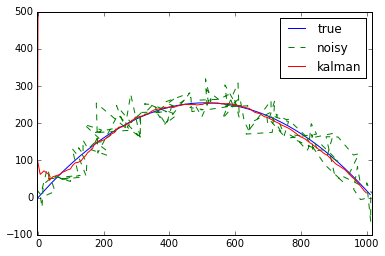

In [16]:
true = pd.DataFrame({'true': ys}, index=xs)
noisy = pd.DataFrame({'noisy': noisy_ys}, index=noisy_xs)
kalman = pd.DataFrame({'kalman': kalman_ys}, index=kalman_xs)

axes = true.plot()
axes = noisy.plot(ax=axes, style=['--'])
kalman.plot(ax=axes)